# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from ddpg_agent import Agent
from datetime import datetime

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe') # Win 64bit V2 20 agents

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# Initialize DDPG agent (will be used for training)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)
print(f'\nAgent initialized with state_size={state_size}, action_size={action_size}')

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


C:\Users\Danie\anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:230: UserWarning: 
NVIDIA GeForce RTX 5080 with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_90 sm_37 compute_37.
If you want to use the NVIDIA GeForce RTX 5080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(



Agent initialized with state_size=33, action_size=4


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
def ddpg(n_episodes=500, max_t=1000, print_every=10,
         noise_start=1.0, noise_end=0.1, noise_decay=0.995,
         learn_every=20, learn_times=10):
    """
    DDPG Training Loop for Reacher Environment (20 agents).
    Uses Udacity Attempt 4 style learning (global timestep counter).
    
    Params
    ======
        n_episodes (int): max training episodes
        max_t (int): max timesteps per episode
        print_every (int): print interval
        noise_start/end/decay: noise schedule params
        learn_every (int): learn every n global timesteps
        learn_times (int): number of learning passes per learn step
    """
    from datetime import datetime
    from ddpg_agent import BATCH_SIZE, GAMMA
    
    run_name = f"runs/ddpg_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    writer = SummaryWriter(run_name)
    
    scores_deque = deque(maxlen=100)
    scores_list = []
    noise_scale = noise_start
    timestep = 0
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            # Get actions WITHOUT noise, then add scaled noise separately
            actions = agent.act(states, add_noise=False)
            noise = agent.noise.sample() * noise_scale
            actions = np.clip(actions + noise, -1, 1)
            
            # Step environment
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            # Store experiences for all agents
            for i in range(num_agents):
                agent.memory.add(states[i], actions[i], rewards[i], next_states[i], dones[i])
            
            timestep += 1
            
            # Learn multiple times every n steps (global timestep)
            if timestep % learn_every == 0 and len(agent.memory) > BATCH_SIZE:
                for _ in range(learn_times):
                    experiences = agent.memory.sample()
                    agent.learn(experiences, GAMMA)
            
            states = next_states
            scores += rewards
            
            if np.any(dones):
                break
        
        # Decay noise
        noise_scale = max(noise_end, noise_scale * noise_decay)
        
        # Track scores
        score = np.mean(scores)
        scores_deque.append(score)
        scores_list.append(score)
        avg_score = np.mean(scores_deque)
        
        # Log to tensorboard
        writer.add_scalar('Score/Episode', score, i_episode)
        writer.add_scalar('Score/Average100', avg_score, i_episode)
        writer.add_scalar('Noise/Scale', noise_scale, i_episode)
        
        print(f'\rEpisode {i_episode}\tAvg: {avg_score:.2f}\tNoise: {noise_scale:.3f}', end="")
        if i_episode % print_every == 0:
            print(f'\rEpisode {i_episode}\tAvg: {avg_score:.2f}\tNoise: {noise_scale:.3f}')
        
        if avg_score >= 30.0:
            print(f'\nSolved in {i_episode-100} episodes!\tAvg: {avg_score:.2f}')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    writer.close()
    return scores_list

In [ ]:
# Quick test - train for 10 episodes to make sure everything works
print("Starting quick test with 10 episodes...")
test_scores = ddpg(n_episodes=10, max_t=100)

# Plot test results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(test_scores)), test_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Quick Test - 10 Episodes')
plt.show()

In [6]:
# Start TensorBoard in separate window (runs in background)
import subprocess
import webbrowser
import time

# Start TensorBoard process
tensorboard_process = subprocess.Popen(
    ['tensorboard', '--logdir', 'runs', '--port', '6006'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print("TensorBoard starting...")
time.sleep(3)  # Wait for TensorBoard to start

# Open browser
webbrowser.open('http://localhost:6006')
print("TensorBoard running at http://localhost:6006")
print("(Browser should open automatically)")

TensorBoard starting...
TensorBoard running at http://localhost:6006
(Browser should open automatically)


In [7]:
# Full training - Version 2 with 20 agents
print("\n=== Starting Full Training ===")
scores = ddpg(
    n_episodes=500, 
    max_t=1000,
    noise_start=1.0,
    noise_end=0.1,       
    noise_decay=0.995,   
    learn_every=20,
    learn_times=10,
    print_every=10
)


=== Starting Full Training ===
Episode 10	Avg: 0.83	Noise: 0.951
Episode 20	Avg: 1.16	Noise: 0.905
Episode 30	Avg: 1.73	Noise: 0.860
Episode 40	Avg: 2.53	Noise: 0.818
Episode 50	Avg: 3.44	Noise: 0.778
Episode 60	Avg: 4.68	Noise: 0.740
Episode 70	Avg: 6.00	Noise: 0.704
Episode 80	Avg: 7.38	Noise: 0.670
Episode 90	Avg: 8.34	Noise: 0.637
Episode 100	Avg: 9.37	Noise: 0.606
Episode 110	Avg: 11.45	Noise: 0.576
Episode 120	Avg: 13.66	Noise: 0.548
Episode 130	Avg: 15.96	Noise: 0.521
Episode 140	Avg: 18.18	Noise: 0.496
Episode 150	Avg: 20.23	Noise: 0.471
Episode 160	Avg: 22.20	Noise: 0.448
Episode 170	Avg: 23.89	Noise: 0.427
Episode 180	Avg: 25.26	Noise: 0.406
Episode 190	Avg: 26.94	Noise: 0.386
Episode 200	Avg: 28.31	Noise: 0.367
Episode 210	Avg: 29.38	Noise: 0.349
Episode 216	Avg: 30.01	Noise: 0.339
Solved in 116 episodes!	Avg: 30.01


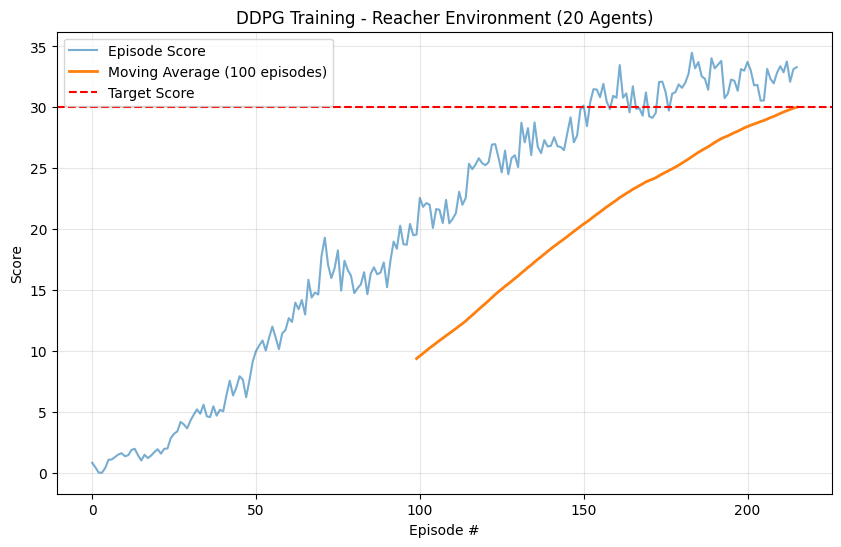


Training completed! Final average score: 30.01


In [8]:
# Plot training results
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha=0.6, label='Episode Score')

# Moving average
window = 100
if len(scores) >= window:
    moving_avg = np.convolve(scores, np.ones(window)/window, mode='valid')
    plt.plot(np.arange(window-1, len(scores)), moving_avg, linewidth=2, label='Moving Average (100 episodes)')

plt.axhline(y=30.0, color='r', linestyle='--', label='Target Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('DDPG Training - Reacher Environment (20 Agents)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('ddpg_training.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nTraining completed! Final average score: {np.mean(scores[-100:]):.2f}")